# 휴대폰 브랜드 이탈 고객 조사 - 머신러닝 훈련

In [102]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [103]:
# 폰트 한글화 세팅

# # window font setting
# font_path = 'C:/Windows/Fonts/batang.ttc'           # 한글 폰트를 적용하여 시각화

# # PJE font setting
# plt.rcParams['font.family'] = 'Malgun Gothic' 

# mac font setting
font_path = '/Library/Fonts/Arial Unicode.ttf'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

### 컬럼명 정리 (21, 22, 23)

| 원본 컬럼명                     | 정리된 컬럼명        |
|---------------------------------|-------------------|
| 고객 고유 번호                | pid                 |
| 스마트폰 제조사                | brand               |
| 이메일                          | email               |
| 메신저                          | messenger           |
| 블로그                          | blog                |
| 클라우드                        | cloud               |
| 온라인 음성통화 여부               | call_check          |
| 년간 서비스 구매 이용 채널          | service_purchase    |
| 모바일 간편 송금                  | money_transfer      |
| 신용카드 저장 (모바일에 신용카드 저장) | credit_card       |
| 통신사 가격                      | agency_purchase     |
| 기기 가격                       | machine_purchase    |
| 가격 부담(부모 or 자신)           | phone_owner         |
| 스마트폰 구분 (데이터 구별)      | data                |
| 스마트폰 DMB 기능             | dmb                 |
| 스마트폰 통신사                | agency              |
| 음성 무제한 서비스 유무        | voice_service       |
| 데이터 무제한 서비스 유무      | data_service        |
| 스마트폰 사용 기간             | use_date            |
| 나이                        | age                 |
| 최종 학력 (학교별로 0~6)        | school              |
| 혼인 유무 (1~4)              | marry               |
| 월평균 소득 (평균 소득 1~18)    | salary              |
| 직업 유무 (직업 유무)          | job                 |
| 종교 유무 (종교 유무)          | religion            |

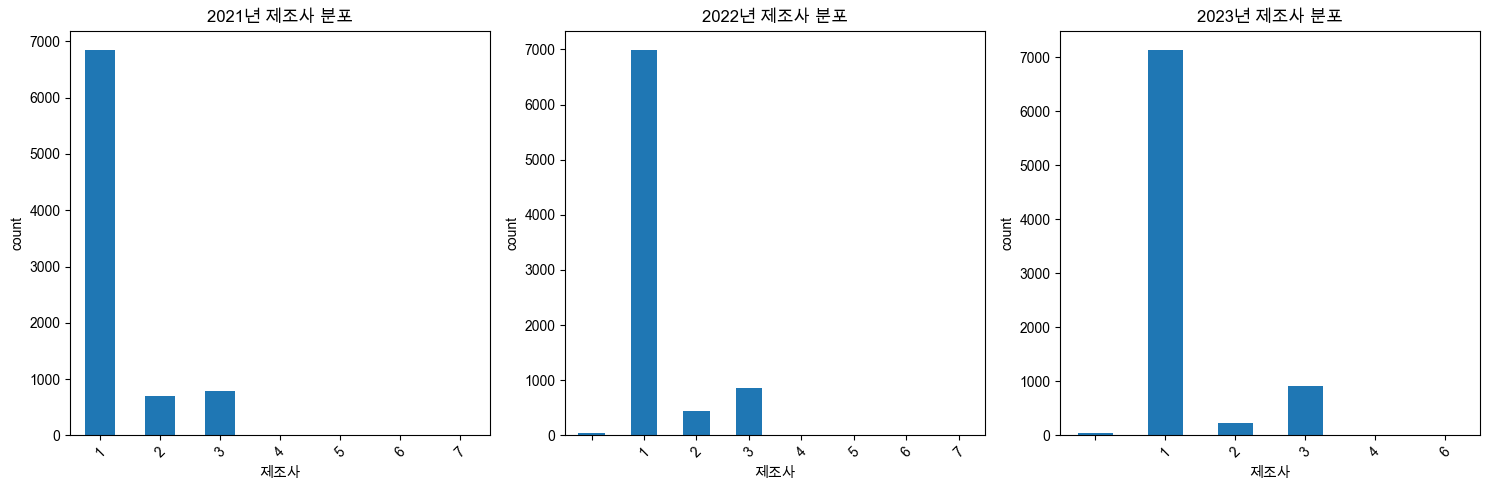

In [104]:
# 시각화 자료로 년도별 제조사 확인

# CSV 파일 읽기
phone_df = pd.read_csv('./data/phone_information.csv', low_memory=False)


# 서브플롯 생성
plt.figure(figsize=(15, 5))

# 2021년 데이터
plt.subplot(1, 3, 1)
phone_df['brand_21'].value_counts().sort_index().plot(kind='bar')
plt.title('2021년 제조사 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=45)

# 2022년 데이터
plt.subplot(1, 3, 2)
phone_df['brand_22'].value_counts().sort_index().plot(kind='bar')
plt.title('2022년 제조사 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=45)

# 2023년 데이터
plt.subplot(1, 3, 3)
phone_df['brand_23'].value_counts().sort_index().plot(kind='bar')
plt.title('2023년 제조사 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

###  데이터 형변환

In [105]:
# # 데이터 값을 unique로 찍어본 결과 str로 들어가있는 데이터가 있어 int로 형변환 해주어야 함
# print(phone_df['brand_21'].unique())
# print(phone_df['brand_22'].unique())
# print(phone_df['brand_23'].unique())
# print(phone_df['money_transfer_21'].unique())

# object 타입인 컬럼들 찾기
object_columns = phone_df.select_dtypes(include=['object']).columns

# object 타입 컬럼들을 숫자형으로 변환
for col in object_columns:
    phone_df.loc[:, col] = pd.to_numeric(phone_df[col], errors='coerce').astype('Int64')

# 변환된 컬럼 수 확인
print(f"\n변환된 컬럼 수: {len(object_columns)}개")
print("변환된 컬럼:", list(object_columns))


변환된 컬럼 수: 31개
변환된 컬럼: ['service_purchase_21', 'money_transfer_21', 'cradit_card_21', 'call_check_22', 'service_purchase_22', 'money_transfer_22', 'cradit_card_22', 'agency_purchase_22', 'machine_purchase_22', 'phone_owner_22', 'data_22', 'dmb_22', 'agency_22', 'voice_service_22', 'data_service_22', 'use_date_22', 'brand_22', 'call_check_23', 'service_purchase_23', 'money_transfer_23', 'cradit_card_23', 'agency_purchase_23', 'machine_purchase_23', 'phone_owner_23', 'data_23', 'dmb_23', 'agency_23', 'voice_service_23', 'data_service_23', 'use_date_23', 'brand_23']


### 값이 없는 데이터 제거

In [106]:
# NA값이 있는 컬럼들 확인

na_columns = phone_df.columns[phone_df.isna().any()].tolist()
print("NA가 있는 컬럼들:")
for col in na_columns:
    na_count = phone_df[col].isna().sum()
    print(f"{col}: {na_count}개의 NA")

print("\n전체 NA 제거 전 데이터 크기:", phone_df.shape)

# 방법 1: NA가 있는 행을 모두 제거
phone_df = phone_df.dropna()
print("\n전체 NA 제거 후 데이터 크기:", phone_df.shape)

NA가 있는 컬럼들:
service_purchase_21: 214개의 NA
money_transfer_21: 214개의 NA
cradit_card_21: 214개의 NA
call_check_22: 45개의 NA
service_purchase_22: 149개의 NA
money_transfer_22: 149개의 NA
cradit_card_22: 149개의 NA
agency_purchase_22: 5개의 NA
machine_purchase_22: 5개의 NA
phone_owner_22: 5개의 NA
data_22: 45개의 NA
dmb_22: 45개의 NA
agency_22: 45개의 NA
voice_service_22: 45개의 NA
data_service_22: 45개의 NA
use_date_22: 45개의 NA
brand_22: 45개의 NA
call_check_23: 45개의 NA
service_purchase_23: 85개의 NA
money_transfer_23: 85개의 NA
cradit_card_23: 85개의 NA
agency_purchase_23: 4개의 NA
machine_purchase_23: 4개의 NA
phone_owner_23: 4개의 NA
data_23: 45개의 NA
dmb_23: 45개의 NA
agency_23: 45개의 NA
voice_service_23: 45개의 NA
data_service_23: 45개의 NA
use_date_23: 45개의 NA
brand_23: 45개의 NA

전체 NA 제거 전 데이터 크기: (8342, 73)

전체 NA 제거 후 데이터 크기: (8071, 73)


###  2021 -> 2022 (이탈자), 2022 -> 2023 (이탈자),  2021 -> 2022 -> 2023 (복귀자)

In [107]:
# 2022년도 이탈자

# 값 빼줌
changed_users22 = phone_df[
   (phone_df['brand_21'] == 1) & 
   (phone_df['brand_22'] != 1)
]

# 결과 확인
print("브랜드 변경 고객 수:", len(changed_users22))
print("\n변경된 사례:")
print(changed_users22[['pid', 'brand_21', 'brand_22']])

# 어떤 브랜드로 변경되었는지 분포 확인
brand_change_22 = changed_users22['brand_22'].value_counts()
print("\n변경된 브랜드 분포:")
print(brand_change_22)


브랜드 변경 고객 수: 523

변경된 사례:
            pid  brand_21 brand_22
1         10002         1        3
72       440001         1        2
75       440004         1        2
95       550002         1        3
105      600005         1        3
...         ...       ...      ...
8215  116530001         1        3
8216  116530002         1        3
8225  116720002         1        2
8226  116720003         1        3
8227  116720004         1        3

[523 rows x 3 columns]

변경된 브랜드 분포:
brand_22
3    308
2    212
6      2
4      1
Name: count, dtype: int64


In [108]:
# 2023년도 이탈자

changed_users23 = phone_df[
   (phone_df['brand_22'] == 1) & 
   (phone_df['brand_23'] != 1)
]

# 결과 확인
print("브랜드 변경 고객 수:", len(changed_users23))
print("\n변경된 사례:")
print(changed_users23[['pid', 'brand_22', 'brand_23']])

# 어떤 브랜드로 변경되었는지 분포 확인
brand_change_23 = changed_users23['brand_23'].value_counts()
print("\n변경된 브랜드 분포:")
print(brand_change_23)



브랜드 변경 고객 수: 442

변경된 사례:
            pid brand_22 brand_23
19       100002        1        3
23       160001        1        2
39       300003        1        3
40       300004        1        3
43       310003        1        3
...         ...      ...      ...
8152  115890003        1        3
8156  115910004        1        3
8238  116990001        1        2
8242  117020001        1        2
8265  117300001        1        2

[442 rows x 3 columns]

변경된 브랜드 분포:
brand_23
3    329
2    106
4      4
6      3
Name: count, dtype: int64


In [109]:
# 2023년도 복귀자       ->     복귀자는 다시 생각해보겠지만 일단 이탈자만 생각하기로 함

returned_users = phone_df[
    (phone_df['brand_21'] == 1) &
   (phone_df['brand_22'] != 1) & 
   (phone_df['brand_23'] == 1)
]

# 결과 확인
print("브랜드 변경 고객 수:", len(returned_users))
print("\n변경된 사례:")
print(returned_users[['pid', 'brand_21', 'brand_22', 'brand_23']])

# 어떤 브랜드로 변경되었는지 분포 확인
brand_return_23 = returned_users['brand_23'].value_counts()
print("\n변경된 브랜드 분포:")
print(brand_return_23)

브랜드 변경 고객 수: 333

변경된 사례:
            pid  brand_21 brand_22 brand_23
1         10002         1        3        1
72       440001         1        2        1
75       440004         1        2        1
105      600005         1        3        1
107      620001         1        3        1
...         ...       ...      ...      ...
8098  115420002         1        2        1
8153  115910001         1        2        1
8215  116530001         1        3        1
8216  116530002         1        3        1
8225  116720002         1        2        1

[333 rows x 4 columns]

변경된 브랜드 분포:
brand_23
1    333
Name: count, dtype: int64


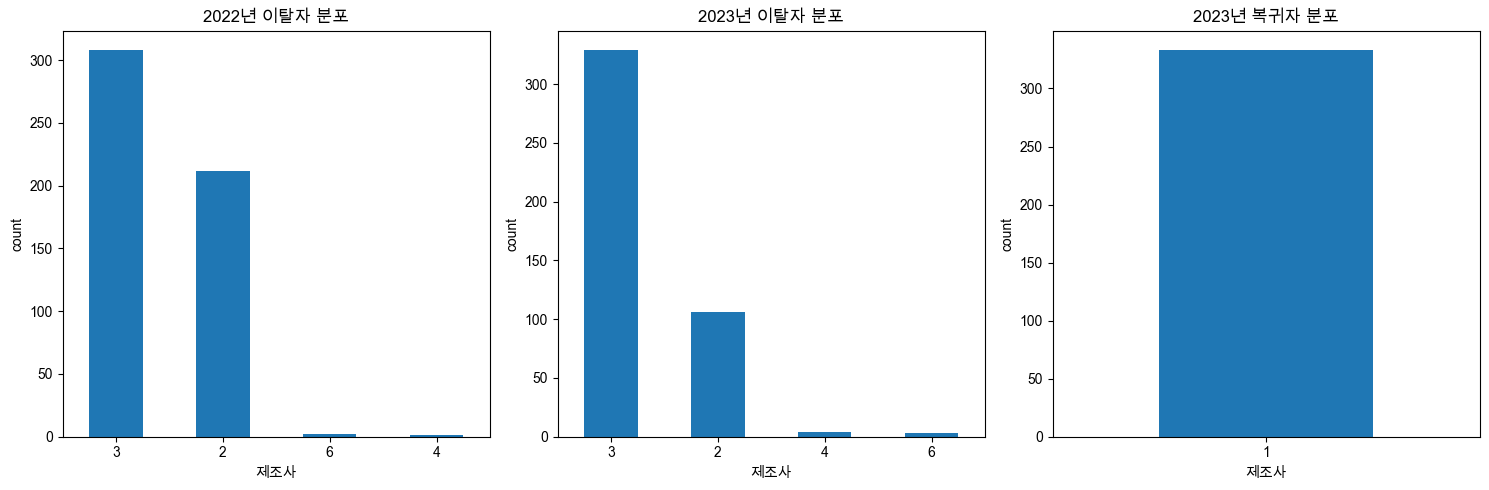

In [110]:
# 시각화 자료로 이탈자, 복귀자 확인

# 서브플롯 생성
plt.figure(figsize=(15, 5))

# 2021년 데이터
plt.subplot(1, 3, 1)
brand_change_22.plot(kind='bar')
plt.title('2022년 이탈자 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=0)

# 2022년 데이터
plt.subplot(1, 3, 2)
brand_change_23.plot(kind='bar')
plt.title('2023년 이탈자 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=0)

# 2023년 데이터
plt.subplot(1, 3, 3)
brand_return_23.plot(kind='bar')
plt.title('2023년 복귀자 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=0)

plt.tight_layout()

plt.show()


In [111]:
total_customer = phone_df['pid'].count()
print(f'전체 인원 수 :{total_customer}')

total_samsung_21 = phone_df[phone_df['brand_21'] == 1]['brand_21'].count()
print(f'21년도 삼성 인원 수 :{total_samsung_21}')

total_samsung_22 = phone_df[phone_df['brand_22'] == 1]['brand_22'].count()
print(f'22년도 삼성 인원 수 :{total_samsung_22}')

total_samsung_23 = phone_df[phone_df['brand_23'] == 1]['brand_23'].count()
print(f'23년도 삼성 인원 수 :{total_samsung_23}')

total_chaged = len(changed_users22) + len(changed_users23)

print(f'전체 이탈자 수 :{total_chaged}')

total_merged = phone_df[phone_df['brand_23'] == 1]['brand_23'].count() + total_chaged
print(f'이탈자를 포함한 총 고객 수 :{total_merged}')



전체 인원 수 :8071
21년도 삼성 인원 수 :6625
22년도 삼성 인원 수 :6801
23년도 삼성 인원 수 :6948
전체 이탈자 수 :965
이탈자를 포함한 총 고객 수 :7913


In [112]:
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8071 entries, 0 to 8341
Data columns (total 73 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   pid                  8071 non-null   int64 
 1   email_21             8071 non-null   int64 
 2   messenger_21         8071 non-null   int64 
 3   blog_21              8071 non-null   int64 
 4   cloud_21             8071 non-null   int64 
 5   call_check_21        8071 non-null   int64 
 6   service_purchase_21  8071 non-null   object
 7   money_transfer_21    8071 non-null   object
 8   cradit_card_21       8071 non-null   object
 9   agency_purchase_21   8071 non-null   int64 
 10  machine_purchase_21  8071 non-null   int64 
 11  phone_owner_21       8071 non-null   int64 
 12  data_21              8071 non-null   int64 
 13  dmb_21               8071 non-null   int64 
 14  agency_21            8071 non-null   int64 
 15  voice_service_21     8071 non-null   int64 
 16  data_servic

In [113]:
phone_df.describe()

,pid,email_21,messenger_21,blog_21,cloud_21,call_check_21,agency_purchase_21,machine_purchase_21,phone_owner_21,data_21,...,email_23,messenger_23,blog_23,cloud_23,age_23,school_23,marry_23,salary_23,job_23,religion_23
count,8.071000e+03,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,...,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000
mean,4.945277e+07,1.280263,1.094412,1.927147,1.822822,1.671788,46.748730,7.960104,1.940404,2.984017,...,1.411721,1.047082,1.937554,1.846983,5.458679,3.289555,1.817990,5.253500,1.365258,1.710569
std,3.822572e+07,0.449155,0.292419,0.259912,0.381843,0.469592,18.738038,11.224890,1.392418,0.708677,...,0.492176,0.211828,0.241978,0.360026,1.754088,0.888750,0.629867,3.605093,0.481532,0.453527
min,1.000100e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,1.571500e+07,1.000000,1.000000,2.000000,2.000000,1.000000,34.000000,0.000000,1.000000,3.000000,...,1.000000,1.000000,2.000000,2.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000
50%,5.026000e+07,1.000000,1.000000,2.000000,2.000000,2.000000,45.000000,0.000000,1.000000,3.000000,...,1.000000,1.000000,2.000000,2.000000,6.000000,3.000000,2.000000,6.000000,1.000000,2.000000
75%,6.978500e+07,2.000000,1.000000,2.000000,2.000000,2.000000,57.000000,15.000000,4.000000,3.000000,...,2.000000,1.000000,2.000000,2.000000,7.000000,4.000000,2.000000,8.000000,2.000000,2.000000
max,1.183300e+08,2.000000,2.000000,2.000000,2.000000,2.000000,200.000000,110.000000,5.000000,4.000000,...,2.000000,2.000000,2.000000,2.000000,8.000000,5.000000,4.000000,18.000000,2.000000,2.000000


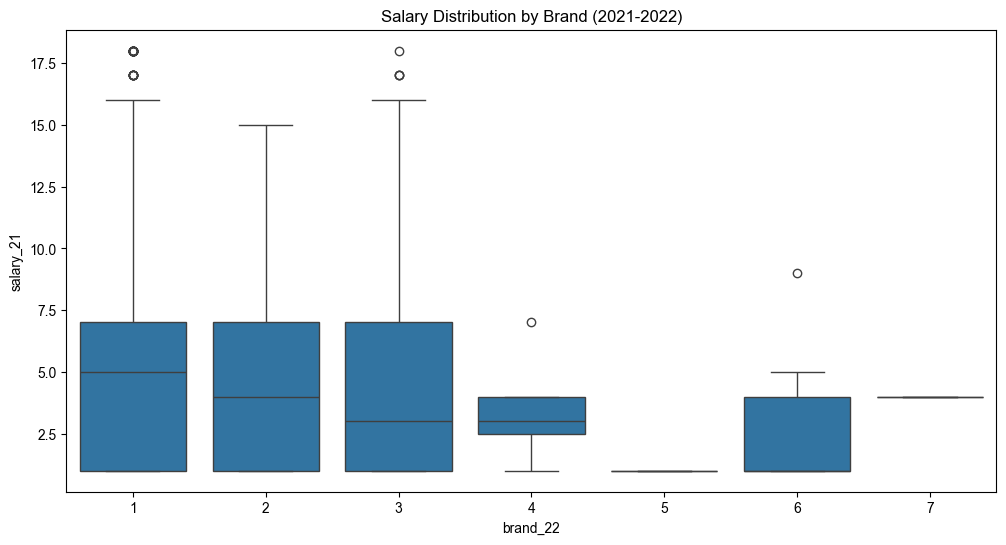

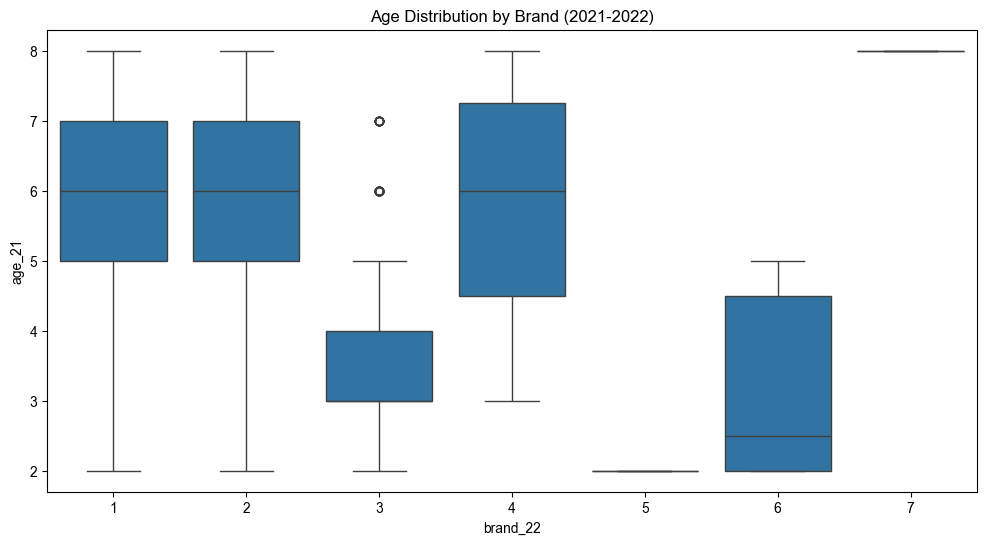

In [114]:
# 각 변수별 이탈 관계 분석 (예: salary와 이탈)
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand_22', y='salary_21', data=phone_df)
plt.title('Salary Distribution by Brand (2021-2022)')
plt.show()

# 연령대별 이탈 패턴
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand_22', y='age_21', data=phone_df)
plt.title('Age Distribution by Brand (2021-2022)')
plt.show()

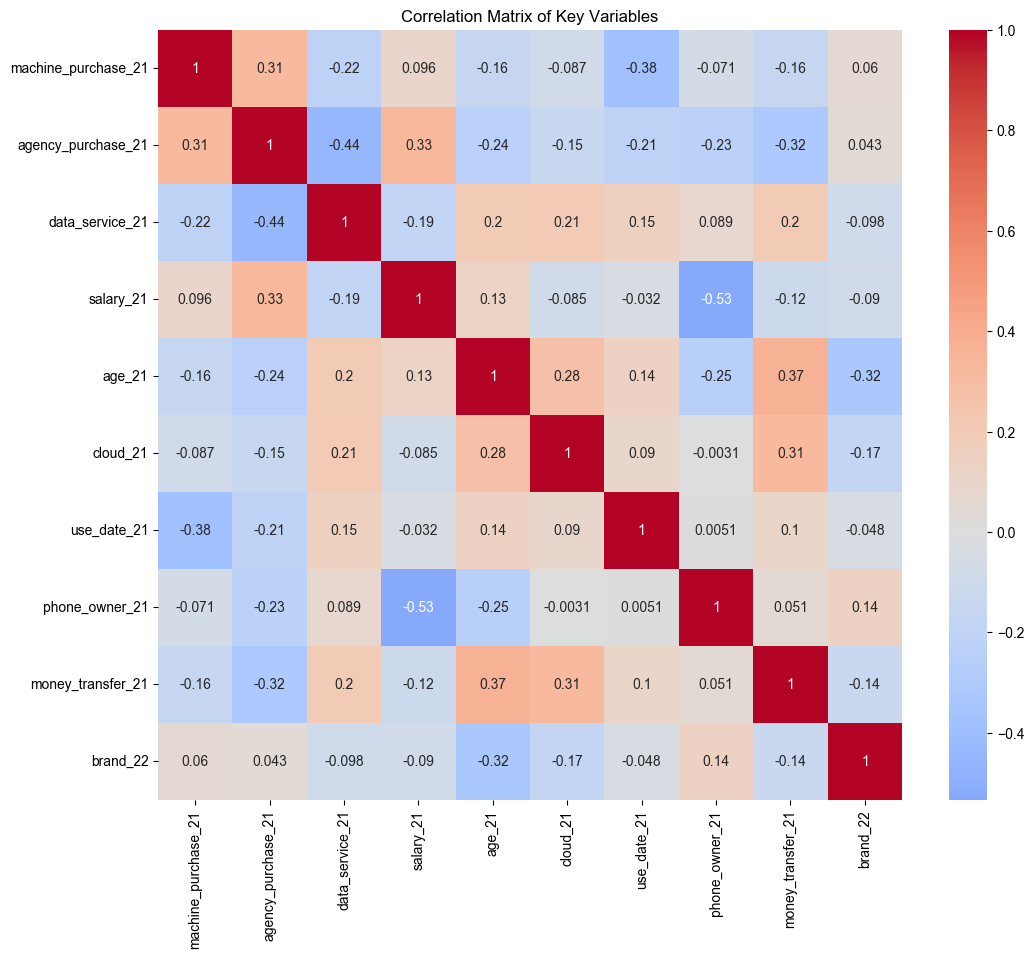

In [115]:
# 주요 변수들의 상관관계 분석
selected_columns = ['machine_purchase_21', 'agency_purchase_21', 'data_service_21', 
                   'salary_21', 'age_21', 'cloud_21', 'use_date_21', 
                   'phone_owner_21', 'money_transfer_21', 'brand_22']

correlation_matrix = phone_df[selected_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Key Variables')
plt.show()

<Figure size 1000x600 with 0 Axes>

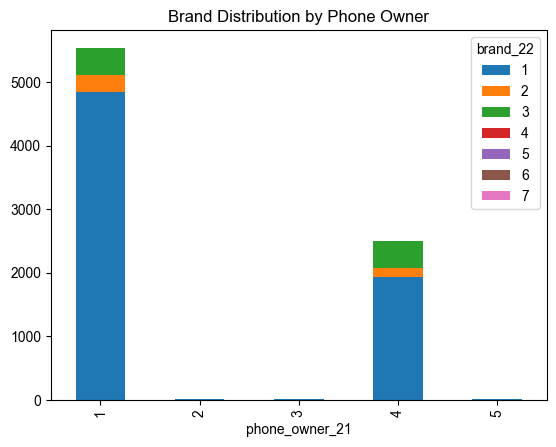

In [116]:
# 범주형 변수의 이탈 관계 분석 (예: phone_owner와 이탈)
plt.figure(figsize=(10, 6))
pd.crosstab(phone_df['phone_owner_21'], phone_df['brand_22']).plot(kind='bar', stacked=True)
plt.title('Brand Distribution by Phone Owner')
plt.show()

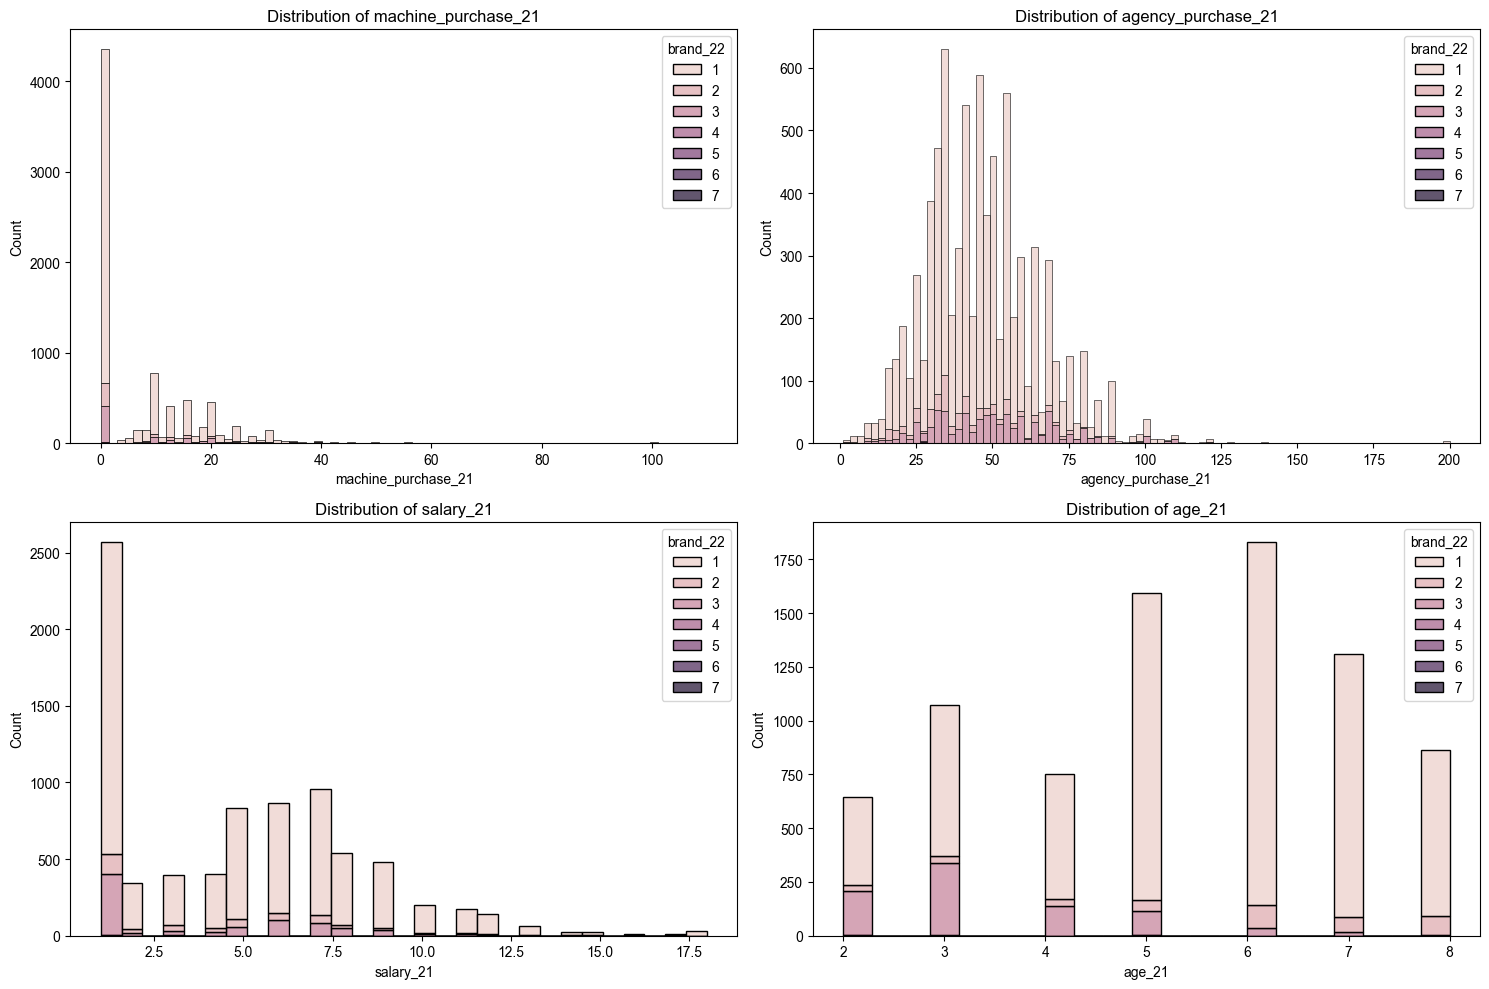

In [117]:
# 연속형 변수들의 분포 확인
plt.figure(figsize=(15, 10))

for i, col in enumerate(['machine_purchase_21', 'agency_purchase_21', 
                        'salary_21', 'age_21'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=phone_df, x=col, hue='brand_22', multiple="stack")
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

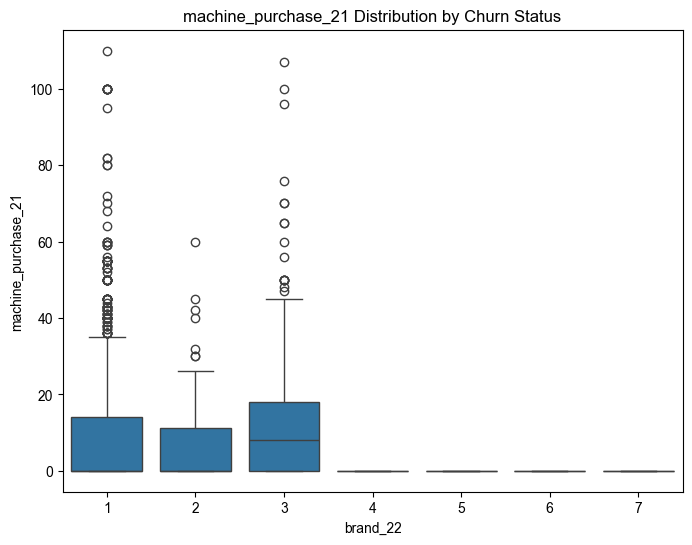

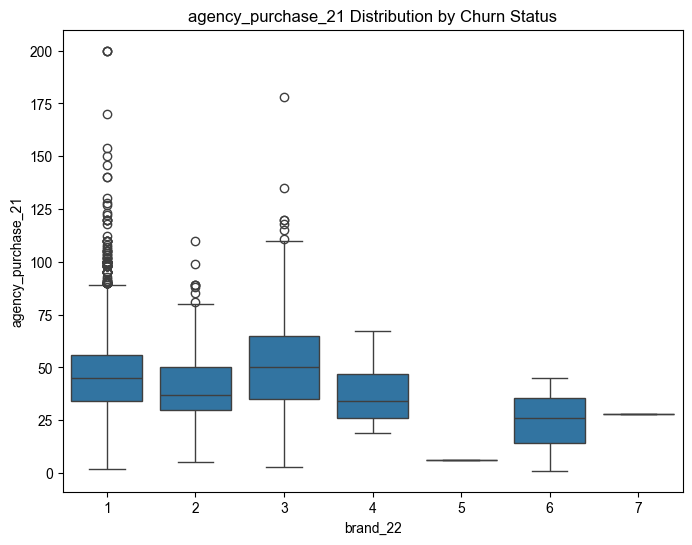

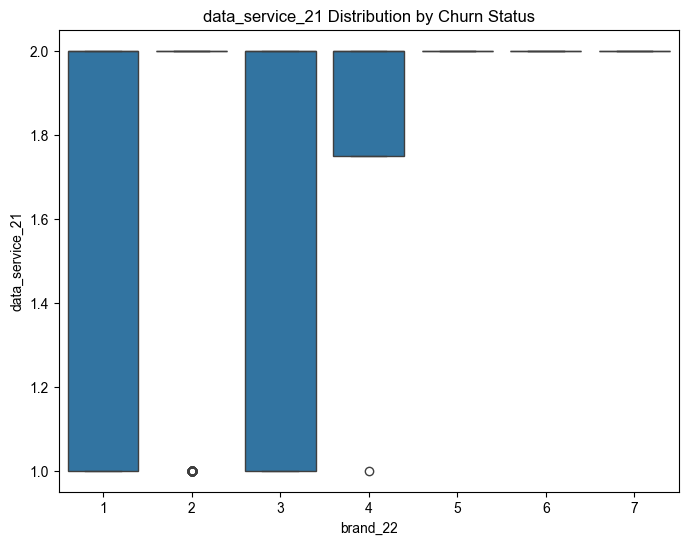

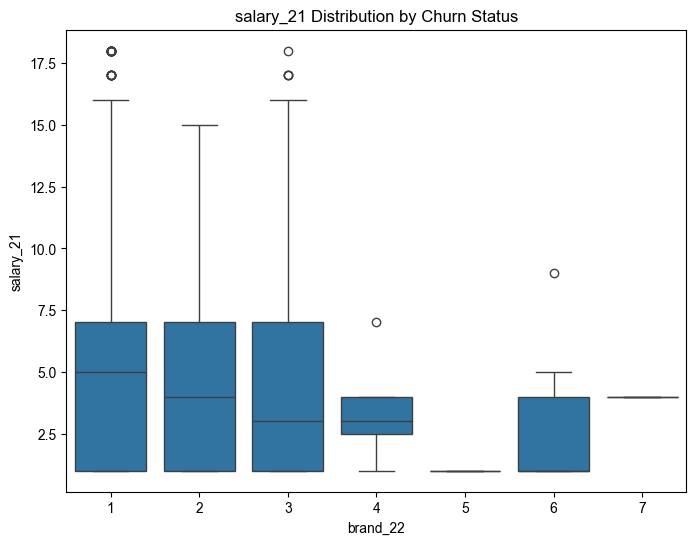

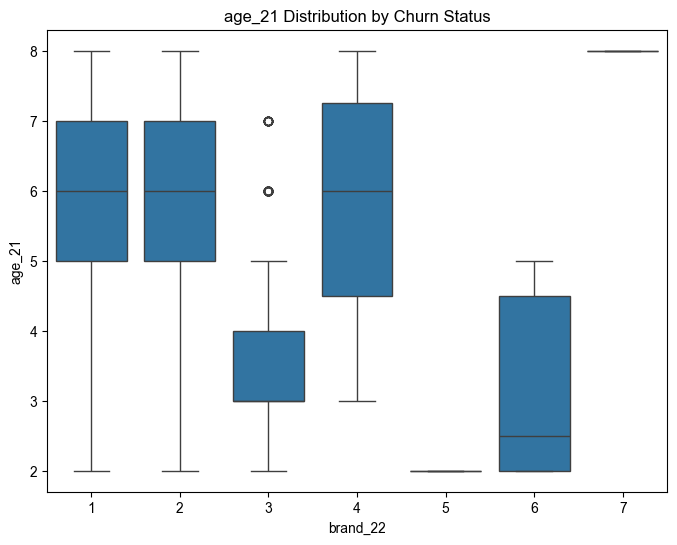

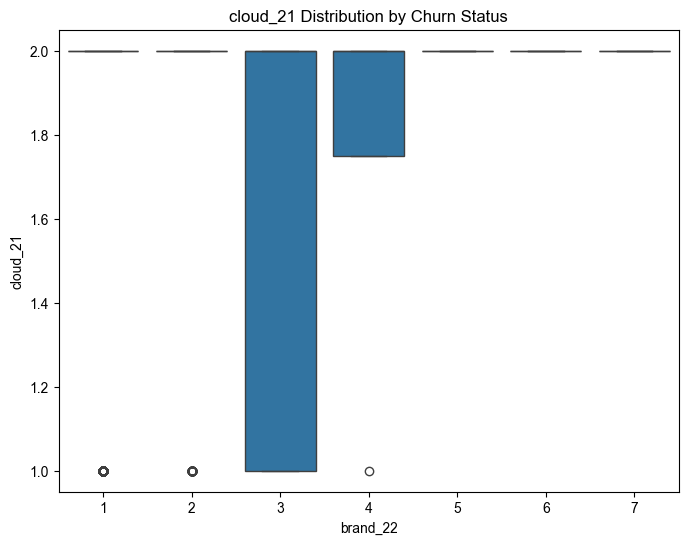

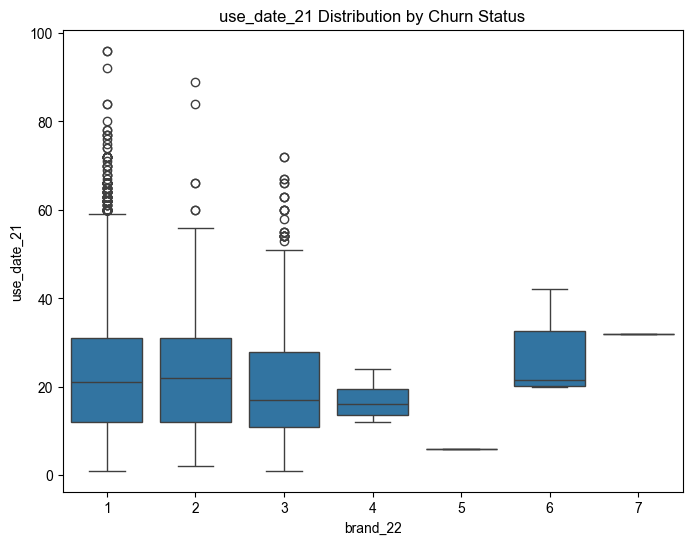

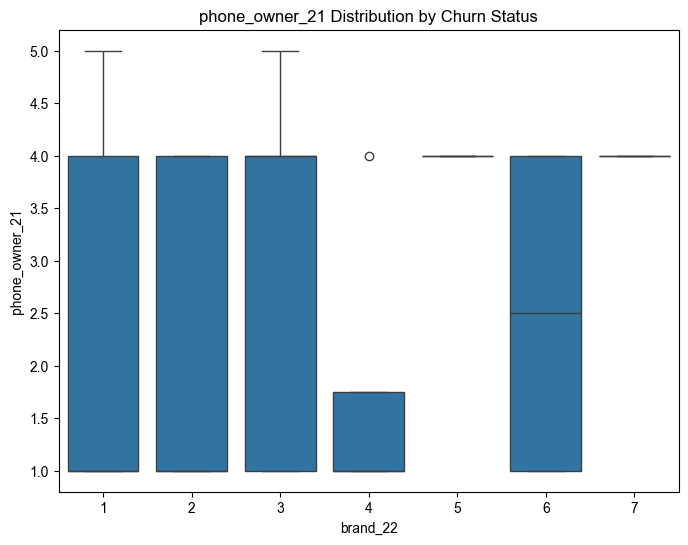

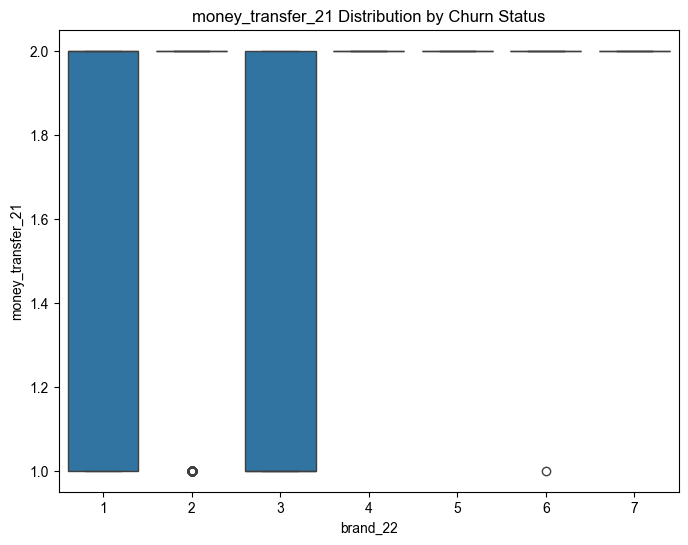

In [118]:
# 이탈 고객의 특성 분석
churn_customers = phone_df[phone_df['brand_22'] != phone_df['brand_21']]
non_churn_customers = phone_df[phone_df['brand_22'] == phone_df['brand_21']]

# 이탈 고객과 비이탈 고객의 특성 비교
for col in selected_columns[:-1]:  # brand_22 제외
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=phone_df, x='brand_22', y=col)
    plt.title(f'{col} Distribution by Churn Status')
    plt.show()

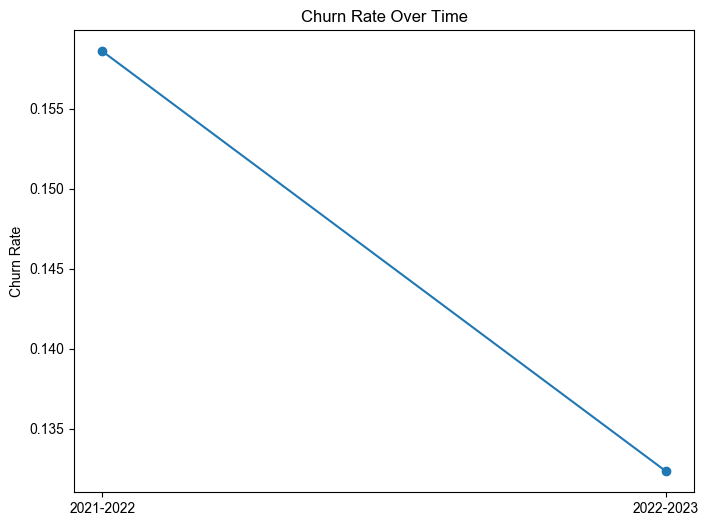

In [119]:
# 연도별 이탈률 변화
churn_rates = []
for year in [22, 23]:
    prev_year = year - 1
    churn_rate = len(phone_df[phone_df[f'brand_{year}'] != phone_df[f'brand_{prev_year}']]) / len(phone_df)
    churn_rates.append(churn_rate)

plt.figure(figsize=(8, 6))
plt.plot(['2021-2022', '2022-2023'], churn_rates, marker='o')
plt.title('Churn Rate Over Time')
plt.ylabel('Churn Rate')
plt.show()

실 데이터 훈련 수

- total_merged  이탈자를 합한 총 데이터
- total_chaged  이탈자 데이터
    - 이탈자의 총 비율 total_changed / totla_merged

---
### 이후에는 데이터를 가지고 각자 머신러닝 훈련

In [120]:
# machine_purchase (기기 가격)
# 고가/저가 기기 선택이 브랜드 충성도에 영향을 미칠 수 있음

# agency_purchase (통신사 가격)
# 통신요금이 기기 선택에 영향을 줄 수 있음

# data_service (데이터 무제한 서비스 유무)
# 데이터 서비스 만족도가 기기 선택에 영향을 미칠 수 있음

# salary (월평균 소득)
# 소득수준에 따른 기기 선택 경향 파악 가능

# age (나이)
# 연령대별 브랜드 선호도 차이 확인 가능

# cloud (클라우드 서비스 사용)
# 제조사의 생태계 서비스 활용도 확인

# service_purchase (서비스 구매 이용 채널)
# 구매 채널에 따른 브랜드 충성도 차이

# use_date (스마트폰 사용 기간)
# 기기 사용 기간과 브랜드 전환의 연관성

# phone_owner (가격 부담 주체: 부모 or 자신)
# 실구매자와 사용자의 차이가 브랜드 선택에 미치는 영향

# money_transfer (모바일 간편 송금)
# 모바일 금융 서비스 활용도와 브랜드 충성도의 관계 

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


Random Forest 성능:               precision    recall  f1-score   support

           0       0.87      0.95      0.91      1383
           1       0.37      0.17      0.23       232

    accuracy                           0.84      1615
   macro avg       0.62      0.56      0.57      1615
weighted avg       0.80      0.84      0.81      1615

Random Forest 정확도: 0.8396
XGBoost 성능:               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1383
           1       0.47      0.22      0.30       232

    accuracy                           0.85      1615
   macro avg       0.67      0.59      0.61      1615
weighted avg       0.82      0.85      0.83      1615

XGBoost 정확도: 0.8520


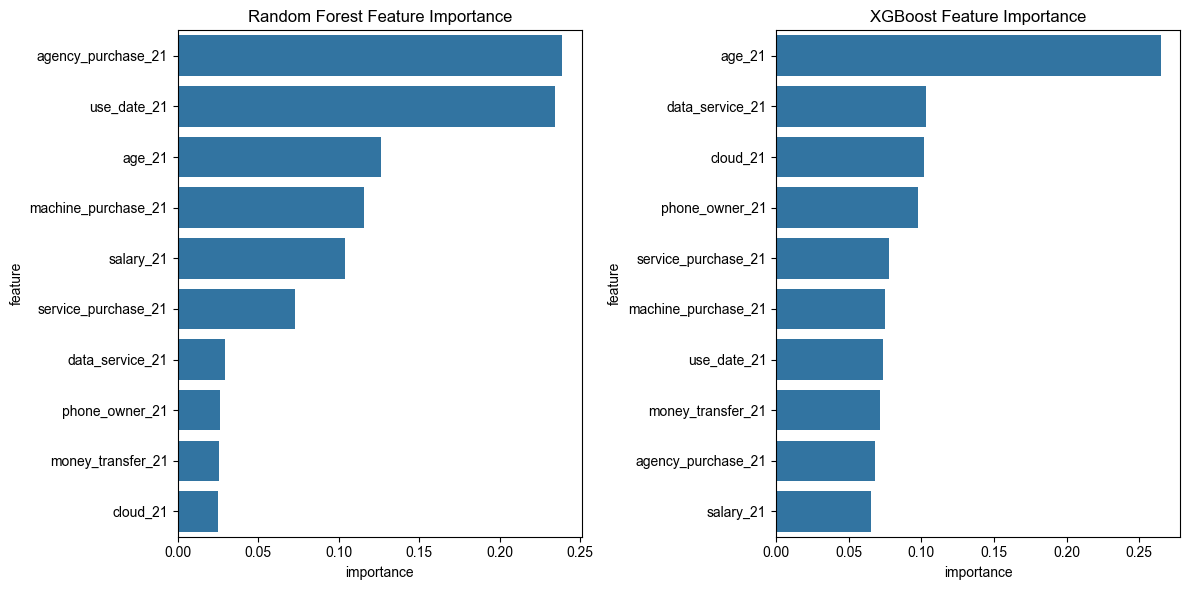

앙상블 모델 성능:               precision    recall  f1-score   support

           0       0.87      0.98      0.92      1383
           1       0.48      0.12      0.20       232

    accuracy                           0.85      1615
   macro avg       0.67      0.55      0.56      1615
weighted avg       0.81      0.85      0.82      1615

앙상블 정확도: 0.8545


In [ ]:
# 2022년도 이탈자에 대한 데이터 훈련 (랜덤포레스트 + XGBoost)

# 데이터 준비

# column 데이터
selected_features = [
    'machine_purchase_21',
    'agency_purchase_21',
    'data_service_21',
    'salary_21',
    'age_21',
    'cloud_21',
    'service_purchase_21',
    'use_date_21',
    'phone_owner_21',
    'money_transfer_21'
]


# 범주형 변수 전처리
le = LabelEncoder()
categorical_features = ['service_purchase_21', 'money_transfer_21']

# 범주형 변수 인코딩
for feature in categorical_features:
    phone_df[feature] = le.fit_transform(phone_df[feature].astype(str))

# 데이터 X, y
X = phone_df[selected_features]
y = (phone_df['brand_22'] != 1).astype(int)

# 데이터 훈련
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# XGBoost
xgb_clf = XGBClassifier(n_estimators=100, random_state=42)
xgb_clf.fit(X_train, y_train)

# 예측 및 평가
rf_pred = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
xgb_pred = xgb_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

print(f"Random Forest 성능: {classification_report(y_test, rf_pred)}")
print(f"Random Forest 정확도: {rf_accuracy:.4f}")

print(f"XGBoost 성능: {classification_report(y_test, xgb_pred)}")
print(f"XGBoost 정확도: {xgb_accuracy:.4f}")

# Random Forest 특성 중요도
plt.figure(figsize=(12, 6))
importance_rf = pd.DataFrame({
    'feature': selected_features,
    'importance': rf_clf.feature_importances_
})
importance_rf = importance_rf.sort_values('importance', ascending=False)

plt.subplot(1, 2, 1)
sns.barplot(data=importance_rf, x='importance', y='feature')
plt.title('Random Forest Feature Importance')

# XGBoost 특성 중요도
importance_xgb = pd.DataFrame({
    'feature': selected_features,
    'importance': xgb_clf.feature_importances_
})
importance_xgb = importance_xgb.sort_values('importance', ascending=False)

plt.subplot(1, 2, 2)
sns.barplot(data=importance_xgb, x='importance', y='feature')
plt.title('XGBoost Feature Importance')


plt.tight_layout()
plt.show()

ensemble_pred = (rf_pred + xgb_pred) / 2
ensemble_pred = (ensemble_pred > 0.5).astype(int)
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)


print(f"앙상블 모델 성능: {classification_report(y_test, ensemble_pred)}")
print(f"앙상블 정확도: {ensemble_accuracy:.4f}")

Random Forest 성능:               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1395
           1       0.46      0.14      0.22       220

    accuracy                           0.86      1615
   macro avg       0.67      0.56      0.57      1615
weighted avg       0.82      0.86      0.83      1615

Random Forest 정확도: 0.8601
XGBoost 성능:               precision    recall  f1-score   support

           0       0.89      0.96      0.92      1395
           1       0.48      0.23      0.31       220

    accuracy                           0.86      1615
   macro avg       0.68      0.59      0.62      1615
weighted avg       0.83      0.86      0.84      1615

XGBoost 정확도: 0.8607


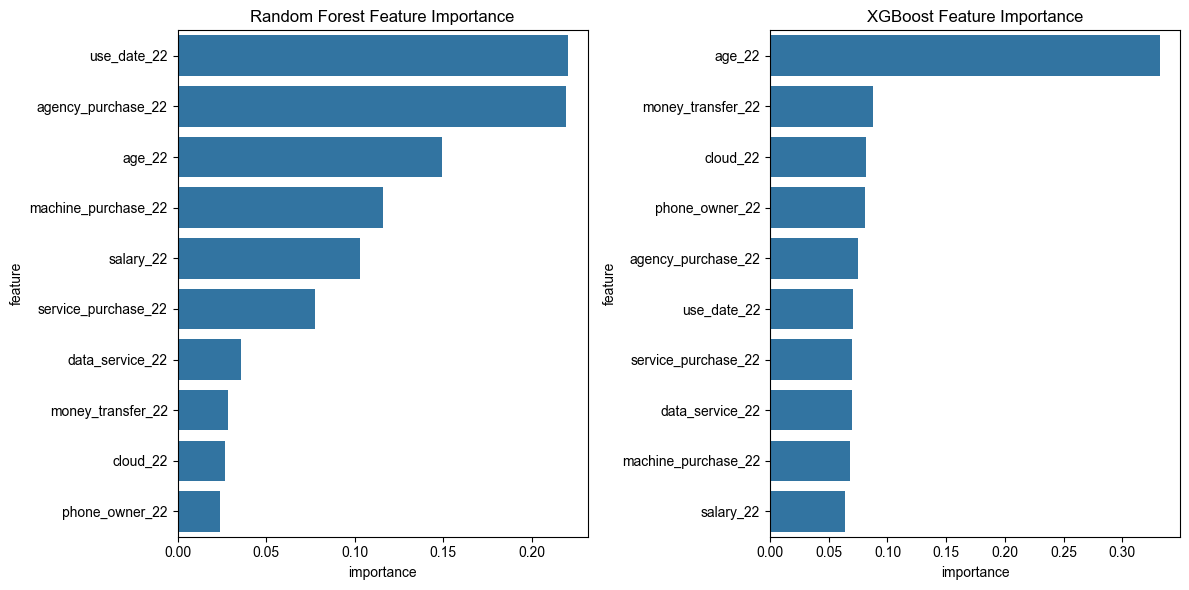

앙상블 모델 성능:               precision    recall  f1-score   support

           0       0.87      0.98      0.92      1395
           1       0.44      0.10      0.16       220

    accuracy                           0.86      1615
   macro avg       0.66      0.54      0.54      1615
weighted avg       0.81      0.86      0.82      1615

앙상블 정확도: 0.8601


In [132]:
# 2023년도 이탈자에 대한 데이터 훈련

# 데이터 준비

# column 데이터
selected_features = [
    'machine_purchase_22',
    'agency_purchase_22',
    'data_service_22',
    'salary_22',
    'age_22',
    'cloud_22',
    'service_purchase_22',
    'use_date_22',
    'phone_owner_22',
    'money_transfer_22'
]


# 범주형 변수 전처리
le = LabelEncoder()
categorical_features = [
    'machine_purchase_22',
    'agency_purchase_22',
    'data_service_22',
    'use_date_22',
    'phone_owner_22',
    'service_purchase_22',
    'money_transfer_22'
]

# 범주형 변수 인코딩
for feature in categorical_features:
    phone_df[feature] = le.fit_transform(phone_df[feature].astype(str))

# 데이터 X, y
X = phone_df[selected_features]
y = (phone_df['brand_23'] != 1).astype(int)

# 데이터 훈련
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# XGBoost
xgb_clf = XGBClassifier(n_estimators=100, random_state=42)
xgb_clf.fit(X_train, y_train)

# 예측 및 평가
rf_pred = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
xgb_pred = xgb_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

print(f"Random Forest 성능: {classification_report(y_test, rf_pred)}")
print(f"Random Forest 정확도: {rf_accuracy:.4f}")

print(f"XGBoost 성능: {classification_report(y_test, xgb_pred)}")
print(f"XGBoost 정확도: {xgb_accuracy:.4f}")

# Random Forest 특성 중요도
plt.figure(figsize=(12, 6))
importance_rf = pd.DataFrame({
    'feature': selected_features,
    'importance': rf_clf.feature_importances_
})
importance_rf = importance_rf.sort_values('importance', ascending=False)

plt.subplot(1, 2, 1)
sns.barplot(data=importance_rf, x='importance', y='feature')
plt.title('Random Forest Feature Importance')

# XGBoost 특성 중요도
importance_xgb = pd.DataFrame({
    'feature': selected_features,
    'importance': xgb_clf.feature_importances_
})
importance_xgb = importance_xgb.sort_values('importance', ascending=False)

plt.subplot(1, 2, 2)
sns.barplot(data=importance_xgb, x='importance', y='feature')
plt.title('XGBoost Feature Importance')


plt.tight_layout()
plt.show()

ensemble_pred = (rf_pred + xgb_pred) / 2
ensemble_pred = (ensemble_pred > 0.5).astype(int)
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)


print(f"앙상블 모델 성능: {classification_report(y_test, ensemble_pred)}")
print(f"앙상블 정확도: {ensemble_accuracy:.4f}")

Decision Tree 성능:               precision    recall  f1-score   support

           0       0.86      0.98      0.92      1383
           1       0.38      0.06      0.11       232

    accuracy                           0.85      1615
   macro avg       0.62      0.52      0.51      1615
weighted avg       0.79      0.85      0.80      1615

Decision Tree 정확도: 0.8502
XGBoost 성능:               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1383
           1       0.48      0.21      0.29       232

    accuracy                           0.85      1615
   macro avg       0.68      0.58      0.60      1615
weighted avg       0.82      0.85      0.83      1615

XGBoost 정확도: 0.8533
앙상블 성능:              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1383
           1       0.48      0.05      0.09       232

    accuracy                           0.86      1615
   macro avg       0.67      0.52      0.50  

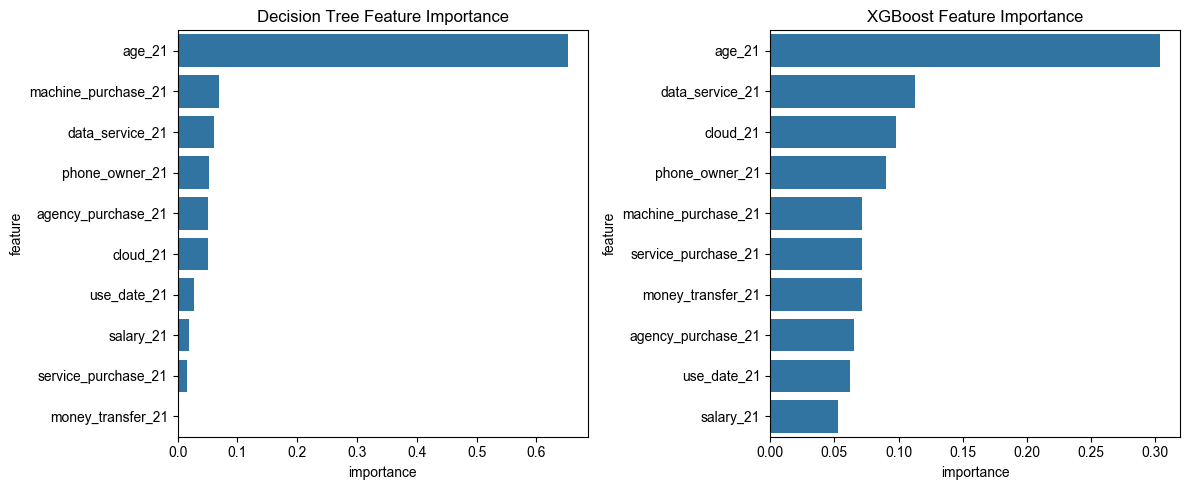

In [137]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
# 2022년도 이탈자에 대한 데이터 훈련 (결정트리 + XGBoost)


# 데이터 준비
selected_features = [
    'machine_purchase_21', 'agency_purchase_21', 'data_service_21',
    'salary_21', 'age_21', 'cloud_21', 'service_purchase_21',
    'use_date_21', 'phone_owner_21', 'money_transfer_21'
]
le = LabelEncoder()
categorical_features = ['service_purchase_21', 'money_transfer_21', 'data_service_21', 
                       'use_date_21', 'phone_owner_21']

for feature in categorical_features:
    phone_df[feature] = le.fit_transform(phone_df[feature].astype(str))

X = phone_df[selected_features]
y = (phone_df['brand_22'] != 1).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_clf.fit(X_train, y_train)

xgb_clf = XGBClassifier(max_depth=5, random_state=42)
xgb_clf.fit(X_train, y_train)

dt_pred = dt_clf.predict(X_test)
xgb_pred = xgb_clf.predict(X_test)

ensemble_pred = ((dt_pred + xgb_pred) / 2 > 0.5).astype(int)

print(f"Decision Tree 성능: {classification_report(y_test, dt_pred)}")
print(f"Decision Tree 정확도: {accuracy_score(y_test, dt_pred):.4f}")

print(f"XGBoost 성능: {classification_report(y_test, xgb_pred)}")
print(f"XGBoost 정확도: {accuracy_score(y_test, xgb_pred):.4f}")

print(f"앙상블 성능:{classification_report(y_test, ensemble_pred)}")
print(f"앙상블 정확도: {accuracy_score(y_test, ensemble_pred):.4f}")

# 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
importance_dt = pd.DataFrame({
    'feature': selected_features,    
    'importance': dt_clf.feature_importances_
})
importance_dt = importance_dt.sort_values('importance', ascending=False)
sns.barplot(data=importance_dt, x='importance', y='feature')
plt.title('Decision Tree Feature Importance')

plt.subplot(1, 2, 2)
importance_xgb = pd.DataFrame({
    'feature': selected_features,
    'importance': xgb_clf.feature_importances_
})
importance_xgb = importance_xgb.sort_values('importance', ascending=False)
sns.barplot(data=importance_xgb, x='importance', y='feature')
plt.title('XGBoost Feature Importance')

plt.tight_layout()
plt.show()

Decision Tree 성능:               precision    recall  f1-score   support

           0       0.87      0.99      0.93      1395
           1       0.59      0.07      0.13       220

    accuracy                           0.87      1615
   macro avg       0.73      0.53      0.53      1615
weighted avg       0.83      0.87      0.82      1615

Decision Tree 정확도: 0.8669
XGBoost 성능:               precision    recall  f1-score   support

           0       0.89      0.96      0.92      1395
           1       0.49      0.23      0.31       220

    accuracy                           0.86      1615
   macro avg       0.69      0.60      0.62      1615
weighted avg       0.83      0.86      0.84      1615

XGBoost 정확도: 0.8625
앙상블 성능:              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1395
           1       0.67      0.05      0.09       220

    accuracy                           0.87      1615
   macro avg       0.77      0.52      0.51  

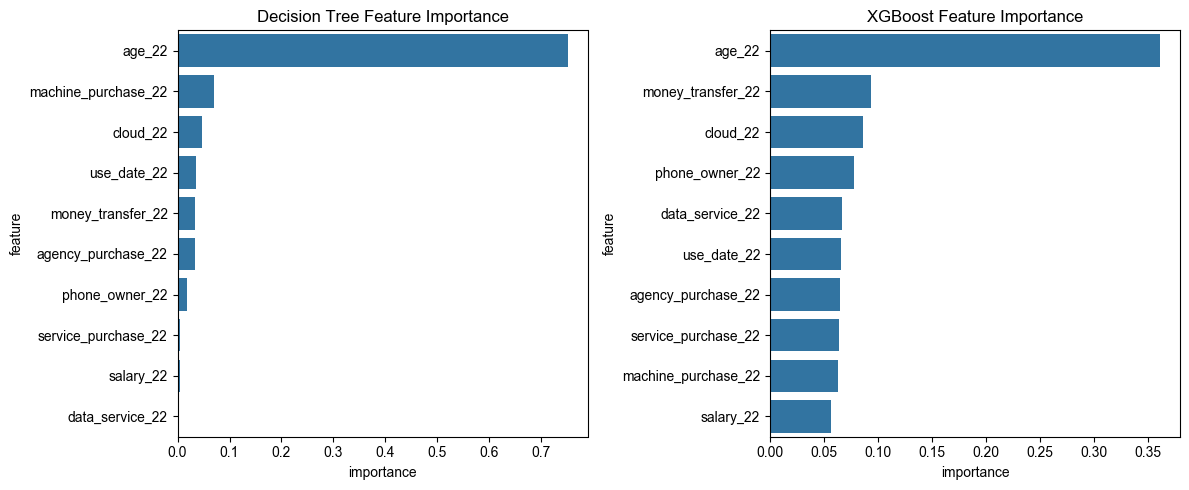

In [138]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
# 2022년도 이탈자에 대한 데이터 훈련 (결정트리 + XGBoost)


# 데이터 준비
selected_features = [
    'machine_purchase_22', 'agency_purchase_22', 'data_service_22',
    'salary_22', 'age_22', 'cloud_22', 'service_purchase_22',
    'use_date_22', 'phone_owner_22', 'money_transfer_22'
]
le = LabelEncoder()
categorical_features = ['service_purchase_22', 'money_transfer_22', 'data_service_22', 
                         'use_date_22', 'phone_owner_22']

for feature in categorical_features:
    phone_df[feature] = le.fit_transform(phone_df[feature].astype(str))

X = phone_df[selected_features]
y = (phone_df['brand_23'] != 1).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_clf.fit(X_train, y_train)

xgb_clf = XGBClassifier(max_depth=5, random_state=42)
xgb_clf.fit(X_train, y_train)

dt_pred = dt_clf.predict(X_test)
xgb_pred = xgb_clf.predict(X_test)

ensemble_pred = ((dt_pred + xgb_pred) / 2 > 0.5).astype(int)

print(f"Decision Tree 성능: {classification_report(y_test, dt_pred)}")
print(f"Decision Tree 정확도: {accuracy_score(y_test, dt_pred):.4f}")

print(f"XGBoost 성능: {classification_report(y_test, xgb_pred)}")
print(f"XGBoost 정확도: {accuracy_score(y_test, xgb_pred):.4f}")

print(f"앙상블 성능:{classification_report(y_test, ensemble_pred)}")
print(f"앙상블 정확도: {accuracy_score(y_test, ensemble_pred):.4f}")

# 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
importance_dt = pd.DataFrame({
    'feature': selected_features,    
    'importance': dt_clf.feature_importances_
})
importance_dt = importance_dt.sort_values('importance', ascending=False)
sns.barplot(data=importance_dt, x='importance', y='feature')
plt.title('Decision Tree Feature Importance')

plt.subplot(1, 2, 2)
importance_xgb = pd.DataFrame({
    'feature': selected_features,
    'importance': xgb_clf.feature_importances_
})
importance_xgb = importance_xgb.sort_values('importance', ascending=False)
sns.barplot(data=importance_xgb, x='importance', y='feature')
plt.title('XGBoost Feature Importance')

plt.tight_layout()
plt.show()